# IMPORTS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier

In [3]:
from sklearn.metrics import accuracy_score,precision_score

import warnings
warnings.filterwarnings("ignore")


# Loading Dataset

In [4]:
Xbox_data=pd.read_csv('train.csv')

# EXPLONATORY DATA ANALYSIS

In [5]:
Xbox_data.head()

,user,sku,category,query,click_time,query_time
0,0001cd0d10bbc585c9ba287c963e00873d4c0bfd,2032076,abcat0701002,gears of war,2011-10-09 17:22:56.101,2011-10-09 17:21:42.917
1,00033dbced6acd3626c4b56ff5c55b8d69911681,9854804,abcat0701002,Gears of war,2011-09-25 13:35:42.198,2011-09-25 13:35:33.234
2,00033dbced6acd3626c4b56ff5c55b8d69911681,2670133,abcat0701002,Gears of war,2011-09-25 13:36:08.668,2011-09-25 13:35:33.234
3,00033dbced6acd3626c4b56ff5c55b8d69911681,9984142,abcat0701002,Assassin creed,2011-09-25 13:37:23.709,2011-09-25 13:37:00.049
4,0007756f015345450f7be1df33695421466b7ce4,2541184,abcat0701002,dead island,2011-09-11 15:15:34.336,2011-09-11 15:15:26.206


In [6]:
Xbox_data.describe()

,sku
count,4.236500e+04
mean,2.360281e+11
std,4.858031e+13
min,1.004622e+06
25%,2.173065e+06
50%,2.670133e+06
75%,3.046603e+06
max,9.999169e+15


In [7]:
Xbox_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42365 entries, 0 to 42364
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user        42365 non-null  object
 1   sku         42365 non-null  int64 
 2   category    42365 non-null  object
 3   query       42365 non-null  object
 4   click_time  42365 non-null  object
 5   query_time  42365 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.9+ MB


In [8]:
Xbox_data['query'].nunique()

5960

In [9]:
Xbox_data['query'].isnull().values.any()

False

In [10]:
Xbox_data['sku'].nunique()

413

In [11]:
Xbox_data['category'].nunique()

1

In [12]:
values = Xbox_data['sku'].value_counts()
values.head(10)

9854804    2966
2107458    2607
2541184    2557
2670133    2321
2173065    2075
2945052    1832
2078113    1343
2953607    1129
2467129    1039
2977637    1019
Name: sku, dtype: int64

In [13]:
newxbox_data=Xbox_data[(Xbox_data['sku']==9854804) | (Xbox_data['sku']== 2107458)]

In [14]:
newxbox_data

,user,sku,category,query,click_time,query_time
1,00033dbced6acd3626c4b56ff5c55b8d69911681,9854804,abcat0701002,Gears of war,2011-09-25 13:35:42.198,2011-09-25 13:35:33.234
12,0010a136a422578130886603598d52f326a8927b,9854804,abcat0701002,Gears of war 3,2011-10-08 15:54:06.4,2011-10-08 15:53:31.486
23,001d856329a212eb052e1597663150a2421a3c02,9854804,abcat0701002,Gears of war 3,2011-09-07 17:48:58.823,2011-09-07 17:48:52.138
31,0030b51e85341499f00456e0706f9a5fec8d1d1e,9854804,abcat0701002,Gears of war 3,2011-09-05 20:25:51.207,2011-09-05 20:25:04.134
39,004070311172f0fa3974a88133b5769135ac2938,9854804,abcat0701002,Gears of war,2011-09-20 02:25:50.707,2011-09-20 02:25:34.905
...,...,...,...,...,...,...
42318,ffad00eed46cb26a07f8bff3d486517ae954a156,9854804,abcat0701002,Gears of war,2011-09-18 13:38:26.501,2011-09-18 13:35:23.344
42336,ffc71fdb3a23e44c42d5b0f6a3000900a84627c8,2107458,abcat0701002,battefield 3,2011-10-20 22:25:26.742,2011-10-20 22:24:26.833
42340,ffd516c399d0e348b5d4d707a29ccbe9defe384b,2107458,abcat0701002,battefield,2011-10-29 12:14:37.458,2011-10-29 12:14:28.764
42343,ffdd8017f1216292021162aa4513d476500c09ce,9854804,abcat0701002,Gears of war 3,2011-09-23 05:44:36.313,2011-09-23 05:44:20.78


<AxesSubplot:>

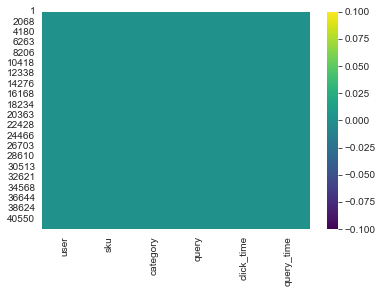

In [15]:
sns.set_style('darkgrid')
sns.heatmap(newxbox_data.isnull(),cmap='viridis')

# Data preprocessing

## including query_length

In [16]:
newxbox_data['query_length']=newxbox_data['query'].apply(len)

<AxesSubplot:ylabel='Frequency'>

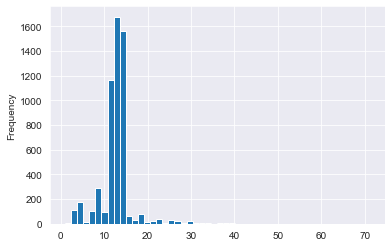

In [17]:
newxbox_data['query_length'].plot(bins=50, kind='hist') 

In [18]:
X = newxbox_data.drop(['user', 'sku', 'category'],axis=1)
y = newxbox_data.sku


In [19]:
X

,query,click_time,query_time,query_length
1,Gears of war,2011-09-25 13:35:42.198,2011-09-25 13:35:33.234,12
12,Gears of war 3,2011-10-08 15:54:06.4,2011-10-08 15:53:31.486,14
23,Gears of war 3,2011-09-07 17:48:58.823,2011-09-07 17:48:52.138,14
31,Gears of war 3,2011-09-05 20:25:51.207,2011-09-05 20:25:04.134,14
39,Gears of war,2011-09-20 02:25:50.707,2011-09-20 02:25:34.905,12
...,...,...,...,...
42318,Gears of war,2011-09-18 13:38:26.501,2011-09-18 13:35:23.344,12
42336,battefield 3,2011-10-20 22:25:26.742,2011-10-20 22:24:26.833,12
42340,battefield,2011-10-29 12:14:37.458,2011-10-29 12:14:28.764,10
42343,Gears of war 3,2011-09-23 05:44:36.313,2011-09-23 05:44:20.78,14


## converting into timestamp

In [20]:
from datetime import datetime

X.click_time = X[['click_time']].transform(lambda x: x + '.' + '0' * 6 if len(x) == 19  else x + (26 - len(x)) * '0')
X.query_time = X[['query_time']].transform(lambda x: x + '.' + '0' * 6 if len(x) == 19  else x + (26 - len(x)) * '0')

X = X.transform({'query': (lambda x: x.lower()), 'click_time':(lambda time: int(''.join(c for c in time if c.isdigit()))), \
                'query_time': (lambda time: int(''.join(c for c in time if c.isdigit())))})

## hash based encoding

In [21]:
query_type = X['query'].unique()
query_size = X['query'].nunique()
query_dict = {query_type[i]: i for i in range(query_size)}
query_dict['ncaa 2011']

408

In [22]:
X =  X.transform({'query': (lambda x: query_dict[x]), 'click_time': (lambda x: x), 'query_time' : (lambda x: x)})

In [23]:
X['query_length']=newxbox_data['query'].apply(len)
X

,query,click_time,query_time,query_length
1,0,20110925133542198,20110925133533234,12
12,1,201110081554064,20111008155331486,14
23,1,20110907174858823,20110907174852138,14
31,1,20110905202551207,20110905202504134,14
39,0,20110920022550707,20110920022534905,12
...,...,...,...,...
42318,0,20110918133826501,20110918133523344,12
42336,338,20111020222526742,20111020222426833,12
42340,155,20111029121437458,20111029121428764,10
42343,1,20110923054436313,2011092305442078,14


# classification algorithms

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
accuracies = dict()

## Random Forest

In [25]:
rfc=RandomForestClassifier(n_estimators=200)
rfc.fit(X_train,y_train)

predictions=rfc.predict(X_test)

In [26]:
accuracy=accuracy_score(y_test,predictions)
print(accuracy)
accuracies['Random Forest']=accuracy*100

0.9503588516746412


## Logistic Regression

In [27]:
mnb=LogisticRegression()
mnb.fit(X_train,y_train)

prednb=mnb.predict(X_test)
accuracy=accuracy_score(y_test,prednb)
print(accuracy)
accuracies['Logistic Regression']=accuracy*100

0.5149521531100478


## LightGBM

In [28]:
X_train_lgb = X_train.astype('float64')
y_train_lgb = y_train.astype('float64')
X_test_lgb = X_test.astype('float64')
y_test_lgb = y_test.astype('float64')

lgb = LGBMClassifier()
lgb.fit(X_train_lgb,y_train_lgb)

Y_pred = lgb.predict(X_test_lgb)
predictions = [round(value) for value in Y_pred]

accuracy = accuracy_score(y_test_lgb,Y_pred)
accuracies['lightGBM']=accuracy*100
print(accuracy)

0.9503588516746412


## KNN

In [29]:
knn=KNeighborsClassifier(n_neighbors=35)
knn.fit(X_train,y_train)
pred_knn=knn.predict(X_test)
accuracy=accuracy_score(y_test,pred_knn)
print(accuracy)
accuracies['KNN']=accuracy*100

0.8008373205741627


In [30]:
error_rate = []

for i in range(1,50):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

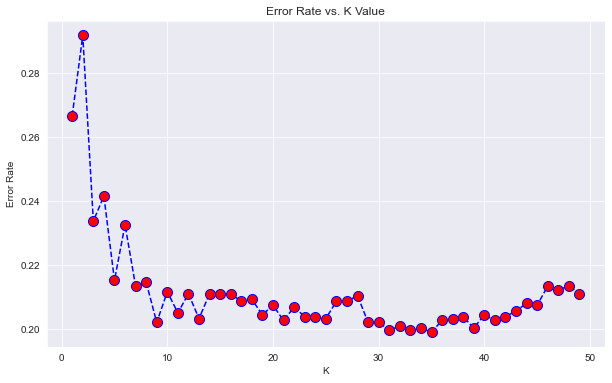

In [31]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [32]:
print(accuracies)

{'Random Forest': 95.03588516746412, 'Logistic Regression': 51.495215311004785, 'lightGBM': 95.03588516746412, 'KNN': 80.08373205741627}


In [33]:
accu = pd.DataFrame.from_dict(accuracies,orient='index',columns = ['Accuracy'])

In [34]:
accu

,Accuracy
Random Forest,95.035885
Logistic Regression,51.495215
lightGBM,95.035885
KNN,80.083732


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy'>

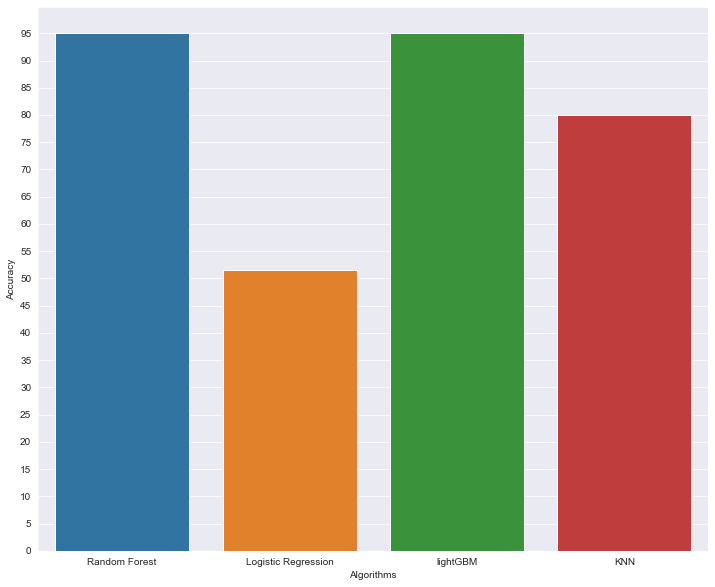

In [35]:
plt.figure(figsize=(12,10))
plt.yticks(np.arange(0,100,5))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=accu.index,y=accu['Accuracy'])

# OneHotEncoding

In [36]:
X_hut=newxbox_data.drop(['sku','category','user'],axis=1)

In [37]:
query=pd.get_dummies(X_hut['query'],drop_first=True)

In [38]:
from datetime import datetime

X_hut.click_time = X_hut[['click_time']].transform(lambda x: x + '.' + '0' * 6 if len(x) == 19  else x + (26 - len(x)) * '0')
X_hut.query_time = X_hut[['query_time']].transform(lambda x: x + '.' + '0' * 6 if len(x) == 19  else x + (26 - len(x)) * '0')

X_hut = X_hut.transform({'click_time':(lambda time: int(''.join(c for c in time if c.isdigit()))), \
                'query_time': (lambda time: int(''.join(c for c in time if c.isdigit())))})

In [39]:
X_hut =  X_hut.transform({ 'click_time': (lambda x: x), 'query_time' : (lambda x: x)})

In [40]:
X_hut=pd.concat([X_hut,query],axis=1)

In [41]:
X_hut.head(10)

,click_time,query_time,20110801_GOW3,201109_Gaming,2371074 2126339 2126108,2398896 2402035 5386263 5386272 6804112 8579932 8589878 9374278 9650424,2622037 2127204 2127213 2121716 2138291,3,3 outlet peer strip,32 lcd tv,...,xbox gears,xbox gears of war,xbox kenet,xbox live gold membership,xbox360,xbox360 av cord,xbox360 game remotes,xbox360 games,yelawolf,you dont know jack the game
1,20110925133542198,20110925133533234,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,201110081554064,20111008155331486,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23,20110907174858823,20110907174852138,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31,20110905202551207,20110905202504134,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39,20110920022550707,20110920022534905,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49,20110925205734937,20110925205727225,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
57,20111031081423333,20111031081405281,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
61,2011102221120448,20111022211147682,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63,20111021005927618,20111021005919095,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
74,2011092817063868,20110928170633724,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
X_hut.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5573 entries, 1 to 42351
Columns: 620 entries, click_time to you dont know jack the game
dtypes: int64(2), uint8(618)
memory usage: 3.4 MB


In [43]:
X_hut
y_hut=newxbox_data['sku']

In [44]:
Xhut_train, Xhut_test, yhut_train, yhut_test = train_test_split(X_hut, y_hut, test_size=0.3, random_state=101)
enc_accuracies=dict()

In [45]:
rfc=RandomForestClassifier(n_estimators=200)
rfc.fit(Xhut_train,yhut_train)

predictions_hut=rfc.predict(Xhut_test)

print(accuracy_score(yhut_test,predictions_hut))


enc_accuracies['Random Forest']=accuracy*100


0.9491626794258373


In [46]:
knn=KNeighborsClassifier(n_neighbors=31)
knn.fit(Xhut_train,yhut_train)
accuracy=knn.predict(Xhut_test)
print(accuracy_score(yhut_test,accuracy))

enc_accuracies['KNN']=accuracy*100

0.7924641148325359


In [47]:
error_rate = []

# Will take some time
for i in range(1,50):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(Xhut_train,yhut_train)
    pred_i = knn.predict(Xhut_test)
    error_rate.append(np.mean(pred_i != yhut_test))

Text(0, 0.5, 'Error Rate')

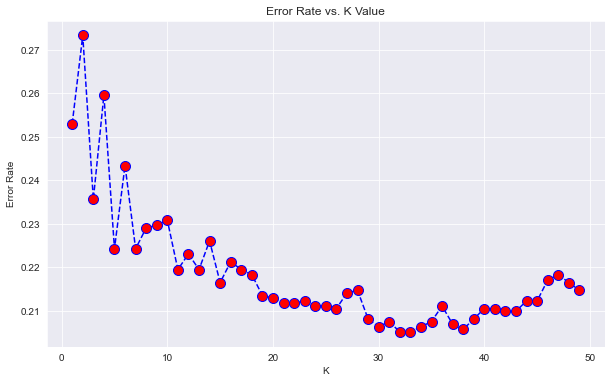

In [48]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [49]:
Xhut_train_lgb = Xhut_train.astype('float64')
yhut_train_lgb = yhut_train.astype('float64')
Xhut_test_lgb = Xhut_test.astype('float64')
yhut_test_lgb = yhut_test.astype('float64')

lgb = LGBMClassifier()
lgb.fit(Xhut_train_lgb,yhut_train_lgb)

Yhut_pred = lgb.predict(Xhut_test_lgb)
predictions = [round(value) for value in Yhut_pred]

accuracy = accuracy_score(yhut_test_lgb,Yhut_pred)
accuracies['lightGBM']=accuracy*100

print(accuracy)

enc_accuracies['LightGBM']=accuracy*100

0.9294258373205742


In [50]:
mnb=LogisticRegression()
mnb.fit(Xhut_train,yhut_train)

pred_nb=mnb.predict(Xhut_test)
accuracy=accuracy_score(yhut_test,pred_nb)
print(accuracy)
accuracies['Logistic Regression']=accuracy*100

enc_accuracies['Logistic Regression']=accuracy*100

0.5149521531100478


In [51]:
print(accuracies)

{'Random Forest': 95.03588516746412, 'Logistic Regression': 51.495215311004785, 'lightGBM': 92.94258373205741, 'KNN': 80.08373205741627}


In [52]:
enc_accu = pd.DataFrame.from_dict(enc_accuracies,orient='index',columns = ['Accuracy'])

In [53]:
enc_accu

,Accuracy
Random Forest,80.083732
KNN,"[210745800, 210745800, 210745800, 985480400, 9..."
LightGBM,92.942584
Logistic Regression,51.495215


<AxesSubplot:title={'center':'Accuracies after onehot encoding'}, xlabel='Algorithms', ylabel='Accuracy'>

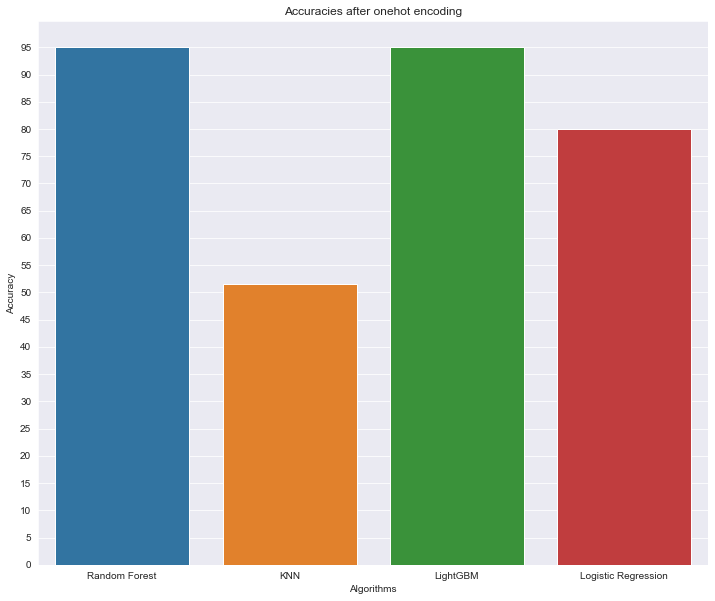

In [54]:
plt.figure(figsize=(12,10))
plt.yticks(np.arange(0,100,5))
plt.title('Accuracies after onehot encoding')
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=enc_accu.index,y=accu['Accuracy'])